In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
model = MinMaxScaler()

In [4]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [15]:
X, y = data[:, 1:], data[:, 0]


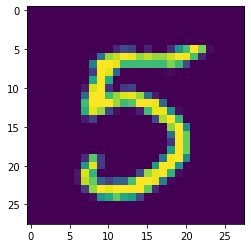

In [17]:
plt.imshow(X[0].reshape(28,28))

In [18]:
X_mod = model.fit_transform(X)

In [24]:
X_mod[0].max()

1.0

In [25]:
X.max()

255

In [26]:
X_mod.min()

0.0

In [27]:
X.min()

0

In [52]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [53]:
encoder = Sequential()
encoder.add(Dense(units=100,activation="relu",input_shape=(784,)))
encoder.add(Dense(units=30,activation="relu",input_shape=(100,)))
decoder = Sequential()
decoder.add(Dense(units=100,activation="relu",input_shape=(30,)))
decoder.add(Dense(units=784,activation="relu",input_shape=(100,)))

In [54]:
model  = Sequential()
model.add(Input(shape=(784,)))
model.add(encoder)
model.add(decoder)

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 30)                81530     
_________________________________________________________________
sequential_6 (Sequential)    (None, 784)               82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [56]:
encoder.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer="adam",loss="mse")



In [58]:
model.fit(X_mod,X_mod,batch_size=400,epochs=30)

Epoch 1/30
50/50 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.0396
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 4/30
50/50 [=

In [59]:
gen = model.predict(X_mod[:10])


In [60]:
gen.shape

(10, 784)

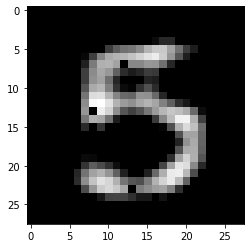

In [61]:
plt.imshow(gen[3].reshape(28,28),cmap="gray")

